In [2]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [57]:
def getChainIds(lines):
  chainIds = []
  for l in lines:
    if l[21] not in chainIds:
      chainIds.append(l[21])

  return chainIds

def getProteinChain(chainId, lines):
  atoms = {}
  for l in lines:
    if l[21] == chainId and l[13:15] == 'CA':
      resSeq = int(l[22:26])
      x = float(l[30:38])
      y = float(l[39:46])
      z = float(l[47:54])
      atoms[resSeq] = (x, y, z)
  return atoms

def getRNAChain(chainId, lines):
  atoms = {}
  nucleotides = ['A', 'U', 'C', 'G']
  for l in lines:
    if l[21] == chainId and l[18:20].strip() in nucleotides:
      resSeq = int(l[22:26])
      x = float(l[30:38])
      y = float(l[39:46])
      z = float(l[47:54])
      atoms[resSeq] = (x, y, z)
  return atoms

def getProteinAminoacids(chainId, lines):
  atoms = {}
  for l in lines:
    if l[21] == chainId and l[13:15] == 'CA':
      resSeq = int(l[22:26])
      atoms[resSeq] = l[17:20].strip()
  return atoms

def getRNANucleotides(chainId, lines):
  atoms = {}
  nucleotides = ['A', 'U', 'C', 'G']
  for l in lines:
    if l[21] == chainId and l[18:20].strip() in nucleotides:
      resSeq = int(l[22:26])
      atoms[resSeq] = l[18:20].strip()
  return atoms

In [4]:
import os

DATABASE_DIR = '/content/drive/MyDrive/structures'

def readFiles():
  proteinChains = {}
  RNAChains = {}
  for filename in os.listdir(DATABASE_DIR):
    with open(f'{DATABASE_DIR}/{filename}', 'r') as fr:
      lines = fr.readlines()
      structCode = filename[:4]
      chainIDs = getChainIds(lines)
      if len(chainIDs) == 2:
        for chainID in chainIDs:
          proteinChain = getProteinChain(chainID, lines)
          if proteinChain != {}:
            proteinChains[structCode] = proteinChain
          RNAChain = getRNAChain(chainID, lines)
          if RNAChain != {}:
            RNAChains[structCode] = RNAChain

  return proteinChains, RNAChains

proteinChains, RNAChains = readFiles()

In [58]:
def getAtoms():
  proteinAminoacids = {}
  RNANucleotides = {}
  for filename in os.listdir(DATABASE_DIR):
    with open(f'{DATABASE_DIR}/{filename}', 'r') as fr:
      lines = fr.readlines()
      structCode = filename[:4]
      chainIDs = getChainIds(lines)
      if len(chainIDs) == 2:
        for chainID in chainIDs:
          proteinAminoacid = getProteinAminoacids(chainID, lines)
          if proteinAminoacid != {}:
            proteinAminoacids[structCode] = proteinAminoacid
          RNANucleotide = getRNANucleotides(chainID, lines)
          if RNANucleotide != {}:
            RNANucleotides[structCode] = RNANucleotide

  return proteinAminoacids, RNANucleotides

proteinAminoacids, RNANucleotides = getAtoms()

In [76]:
from collections import Counter

protein_aminoacids = {}

for key, v in proteinAminoacids.items():
  res = Counter(v.values())
  protein_aminoacids[key] = res

In [95]:
import pandas as pd

plot_protein_data = []

for key, values in proteinChains.items():
  plot_protein_data.append(
      [
          key,
          len(values)
      ]
  )


protein_df = pd.DataFrame (
    plot_protein_data,
    columns = [
        'Structure',
        'Number of amino acids'
    ]
)

protein_df

,Structure,Number of amino acids
0,1a4t,19
1,1biv,17
2,1aud,101
3,1exy,16
4,1emi,136
...,...,...
193,8fti,737
194,8e28,690
195,8e2a,686
196,8as6,1566


In [94]:
plot_protein_aminoacides_data = []

for key, values in proteinChains.items():
  plot_protein_aminoacides_data.append(
      [
          key,
          protein_aminoacids[key]['ALA'],
          protein_aminoacids[key]['ARG'],
          protein_aminoacids[key]['ASN'],
          protein_aminoacids[key]['ASP'],
          protein_aminoacids[key]['CYS'],
          protein_aminoacids[key]['GLN'],
          protein_aminoacids[key]['GLU'],
          protein_aminoacids[key]['GLY'],
          protein_aminoacids[key]['HIS'],
          protein_aminoacids[key]['LEU'],
          protein_aminoacids[key]['ILE'],
          protein_aminoacids[key]['LYS'],
          protein_aminoacids[key]['MET'],
          protein_aminoacids[key]['PHE'],
          protein_aminoacids[key]['PRO'],
          protein_aminoacids[key]['SER'],
          protein_aminoacids[key]['THR'],
          protein_aminoacids[key]['TRP'],
          protein_aminoacids[key]['TYR'],
          protein_aminoacids[key]['VAL'],
      ]
  )


protein_aminoacides_df = pd.DataFrame (
    plot_protein_aminoacides_data,
    columns = [
        'Structure',
        'ALA',
        'ARG',
        'ASN',
        'ASP',
        'CYS',
        'GLN',
        'GLU',
        'GLY',
        'HIS',
        'LEU',
        'ILE',
        'LYS',
        'MET',
        'PHE',
        'PRO',
        'SER',
        'THR',
        'TRP',
        'TYR',
        'VAL',
    ]
)

print(protein_aminoacides_df)

,Structure,ALA,ARG,ASN,ASP,CYS,GLN,GLU,GLY,HIS,...,ILE,LYS,MET,PHE,PRO,SER,THR,TRP,TYR,VAL
0,1a4t,2,6,1,1,0,0,2,0,1,...,1,2,0,0,0,0,2,0,0,0
1,1biv,0,7,0,0,0,0,0,4,0,...,1,1,0,0,2,1,1,0,0,0
2,1aud,7,6,5,5,0,4,4,4,2,...,10,11,4,7,4,8,5,0,3,5
3,1exy,0,7,0,0,0,1,0,0,0,...,0,2,1,0,3,1,1,0,0,0
4,1emi,6,20,1,7,1,2,10,13,2,...,12,9,1,2,9,5,6,1,6,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,8fti,51,56,28,46,14,23,59,47,22,...,39,73,10,42,11,31,23,8,37,54
194,8e28,52,41,16,41,15,31,49,31,19,...,32,42,16,33,41,45,29,5,19,49
195,8e2a,52,41,15,42,15,30,48,31,19,...,32,42,16,33,40,45,29,5,19,49
196,8as6,97,94,58,78,26,47,114,91,40,...,83,104,46,74,59,141,80,26,43,96


from matplotlib import pyplot as plt
protein_aminoacides_df['ALA'].plot(kind='hist', bins=20, title='ALA')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
protein_aminoacides_df['ARG'].plot(kind='hist', bins=20, title='ARG')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
protein_aminoacides_df['ASN'].plot(kind='hist', bins=20, title='ASN')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
protein_aminoacides_df['ASP'].plot(kind='hist', bins=20, title='ASP')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
protein_aminoacides_df.plot(kind='scatter', x='ALA', y='ARG', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
protein_aminoacides_df.plot(kind='scatter', x='ARG', y='ASN', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
protein_aminoacides_df.plot(kind='scatter', x='ASN', y='ASP', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
protein_aminoacides_df.plot(kind='scatter', x='ASP', y='CYS', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
protein_aminoacides_df['ALA'].plot(kind='line', figsize=(8, 4), title='ALA')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
protein_aminoacides_df['ARG'].plot(kind='line', figsize=(8, 4), title='ARG')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
protein_aminoacides_df['ASN'].plot(kind='line', figsize=(8, 4), title='ASN')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
protein_aminoacides_df['ASP'].plot(kind='line', figsize=(8, 4), title='ASP')
plt.gca().spines[['top', 'right']].set_visible(False)

In [105]:
columns = [
    'ALA',
    'ARG',
    'ASN',
    'ASP',
    'CYS',
    'GLN',
    'GLU',
    'GLY',
    'HIS',
    'LEU',
    'ILE',
    'LYS',
    'MET',
    'PHE',
    'PRO',
    'SER',
    'THR',
    'TRP',
    'TYR',
    'VAL',
]

tot_aminoacids = []
for column in columns:
  tot = protein_aminoacides_df[column].sum()
  tot_aminoacids.append(tot)

[3812,
 3463,
 2625,
 2988,
 655,
 2278,
 3983,
 3261,
 1241,
 5666,
 3527,
 4137,
 1206,
 2547,
 2323,
 3664,
 2823,
 512,
 2144,
 3647]

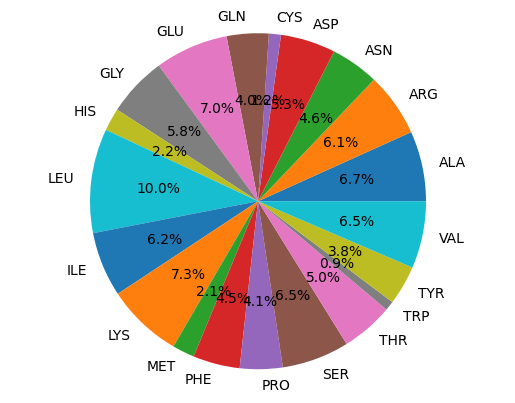

In [106]:
import matplotlib.pyplot as plt

fig1, ax1 = plt.subplots()
ax1.pie(tot_aminoacids,
        labels=columns,
        autopct='%1.1f%%')

ax1.axis('equal')
plt.show()

In [80]:
rna_nucleotides = {}

for key, v in RNANucleotides.items():
  res = Counter(v.values())
  rna_nucleotides[key] = res

In [93]:
plot_rna_data = []

for key, values in RNAChains.items():
  plot_rna_data.append(
      [
          key,
          len(values)
      ]
  )

rna_df = pd.DataFrame (
    plot_rna_data,
    columns = [
        'Structure',
        'Number of nucleotides'
    ]
)

rna_df

,Structure,Number of nucleotides
0,1a4t,15
1,1biv,28
2,1aud,30
3,1exy,33
4,1emi,161
...,...,...
193,8fti,97
194,8e28,15
195,8e2a,15
196,8as6,14


In [91]:
plot_rna_nucleotides_data = []

for key, values in RNAChains.items():
  plot_rna_nucleotides_data.append(
      [
          key,
          rna_nucleotides[key]['A'],
          rna_nucleotides[key]['U'],
          rna_nucleotides[key]['C'],
          rna_nucleotides[key]['G'],
      ]
  )

rna_nucleotides_df = pd.DataFrame (
    plot_rna_nucleotides_data,
    columns = [
        'Structure',
        'A',
        'U',
        'C',
        'G',
    ]
)

rna_nucleotides_df

,Structure,A,U,C,G
0,1a4t,4,1,5,5
1,1biv,4,7,9,8
2,1aud,5,6,10,9
3,1exy,6,4,11,12
4,1emi,33,39,39,50
...,...,...,...,...,...
193,8fti,26,28,19,24
194,8e28,0,14,1,0
195,8e2a,0,7,4,4
196,8as6,5,0,6,3


from matplotlib import pyplot as plt
rna_nucleotides_df['A'].plot(kind='hist', bins=20, title='A')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
rna_nucleotides_df['U'].plot(kind='hist', bins=20, title='U')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
rna_nucleotides_df['C'].plot(kind='hist', bins=20, title='C')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
rna_nucleotides_df['G'].plot(kind='hist', bins=20, title='G')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
rna_nucleotides_df.plot(kind='scatter', x='A', y='U', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
rna_nucleotides_df.plot(kind='scatter', x='U', y='C', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
rna_nucleotides_df.plot(kind='scatter', x='C', y='G', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
rna_nucleotides_df['A'].plot(kind='line', figsize=(8, 4), title='A')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
rna_nucleotides_df['U'].plot(kind='line', figsize=(8, 4), title='U')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
rna_nucleotides_df['C'].plot(kind='line', figsize=(8, 4), title='C')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
rna_nucleotides_df['G'].plot(kind='line', figsize=(8, 4), title='G')
plt.gca().spines[['top', 'right']].set_visible(False)

In [107]:
columns = [
    'A',
    'U',
    'C',
    'G',
]

tot_nucleotides = []
for column in columns:
  tot = rna_nucleotides_df[column].sum()
  tot_nucleotides.append(tot)

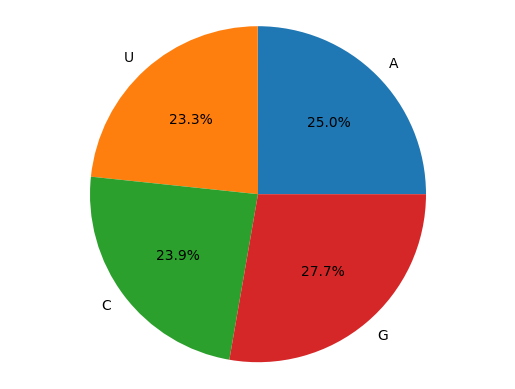

In [108]:
import matplotlib.pyplot as plt

fig1, ax1 = plt.subplots()
ax1.pie(tot_nucleotides,
        labels=columns,
        autopct='%1.1f%%')

ax1.axis('equal')
plt.show()

In [90]:
df = pd.merge(protein_df, rna_df, on = "Structure")

df

,Structure,Number of amino acids,ALA,ARG,ASN,ASP,CYS,GLN,GLU,GLY,...,SER,THR,TRP,TYR,VAL,Number of nucleotides,A,U,C,G
0,1a4t,19,2,6,1,1,0,0,2,0,...,0,2,0,0,0,15,4,1,5,5
1,1biv,17,0,7,0,0,0,0,0,4,...,1,1,0,0,0,28,4,7,9,8
2,1aud,101,7,6,5,5,0,4,4,4,...,8,5,0,3,5,30,5,6,10,9
3,1exy,16,0,7,0,0,0,1,0,0,...,1,1,0,0,0,33,6,4,11,12
4,1emi,136,6,20,1,7,1,2,10,13,...,5,6,1,6,13,161,33,39,39,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,8fti,737,51,56,28,46,14,23,59,47,...,31,23,8,37,54,97,26,28,19,24
194,8e28,690,52,41,16,41,15,31,49,31,...,45,29,5,19,49,15,0,14,1,0
195,8e2a,686,52,41,15,42,15,30,48,31,...,45,29,5,19,49,15,0,7,4,4
196,8as6,1566,97,94,58,78,26,47,114,91,...,141,80,26,43,96,14,5,0,6,3


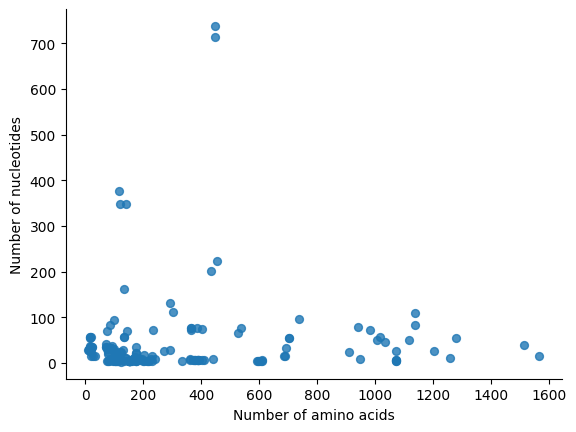

In [8]:
from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Number of amino acids', y='Number of nucleotides', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

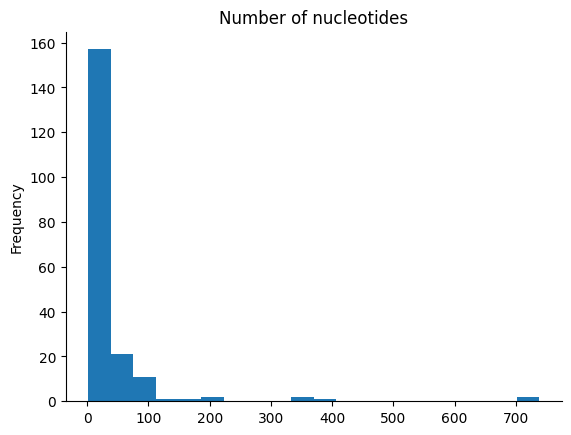

In [9]:
from matplotlib import pyplot as plt
df['Number of nucleotides'].plot(kind='hist', bins=20, title='Number of nucleotides')
plt.gca().spines[['top', 'right',]].set_visible(False)

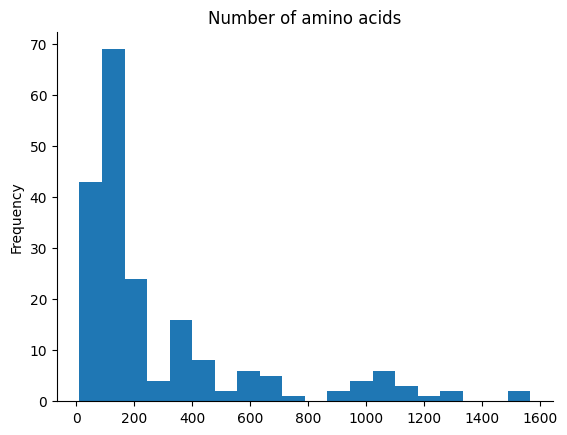

In [10]:
from matplotlib import pyplot as plt
df['Number of amino acids'].plot(kind='hist', bins=20, title='Number of amino acids')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [30]:
import pandas as pd

plot_rna_data = []

for key, values in RNAChains.items():
  if len(values) < 150:
    plot_rna_data.append([key, len(values)])


rna_df = pd.DataFrame(plot_rna_data, columns=['Structure', 'Number of nucleotides'])
print(rna_df)

    Structure  Number of nucleotides
0        1a4t                     15
1        1biv                     28
2        1aud                     30
3        1exy                     33
4        1etf                     34
..        ...                    ...
185      8fti                     97
186      8e28                     15
187      8e2a                     15
188      8as6                     14
189      8acc                      5

[190 rows x 2 columns]


In [31]:
plot_protein_data = []

for key, values in proteinChains.items():
  if len(values) < 800:
    plot_protein_data.append([key, len(values)])

protein_df = pd.DataFrame(plot_protein_data, columns=['Structure', 'Number of amino acids'])
print(protein_df)

    Structure  Number of amino acids
0        1a4t                     19
1        1biv                     17
2        1aud                    101
3        1exy                     16
4        1emi                    136
..        ...                    ...
173      7zpi                    705
174      8fti                    737
175      8e28                    690
176      8e2a                    686
177      8acc                    231

[178 rows x 2 columns]


In [32]:
df = pd.merge(protein_df, rna_df, on = "Structure")

df

,Structure,Number of amino acids,Number of nucleotides
0,1a4t,19,15
1,1biv,17,28
2,1aud,101,30
3,1exy,16,33
4,1etf,23,34
...,...,...,...
165,7zpi,705,55
166,8fti,737,97
167,8e28,690,15
168,8e2a,686,15


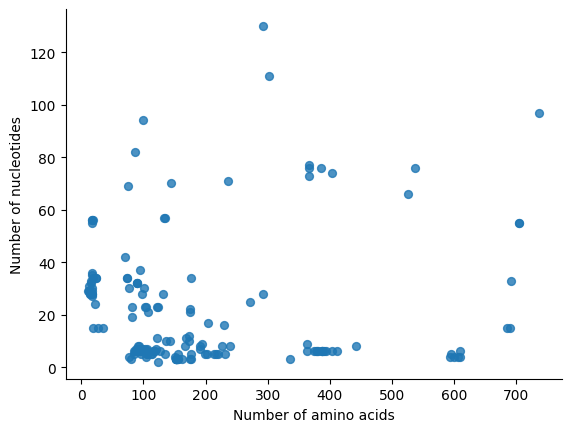

In [33]:
from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Number of amino acids', y='Number of nucleotides', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

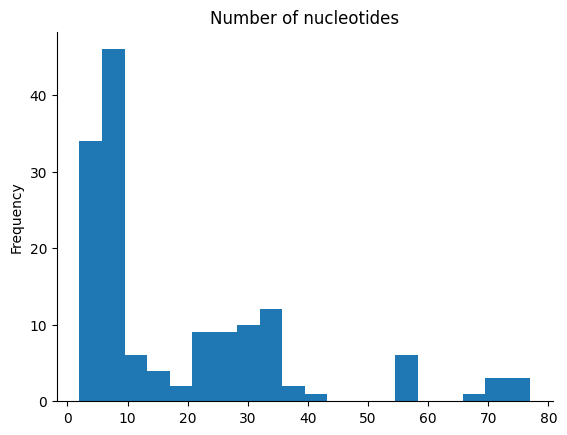

In [28]:
from matplotlib import pyplot as plt
df['Number of nucleotides'].plot(kind='hist', bins=20, title='Number of nucleotides')
plt.gca().spines[['top', 'right',]].set_visible(False)

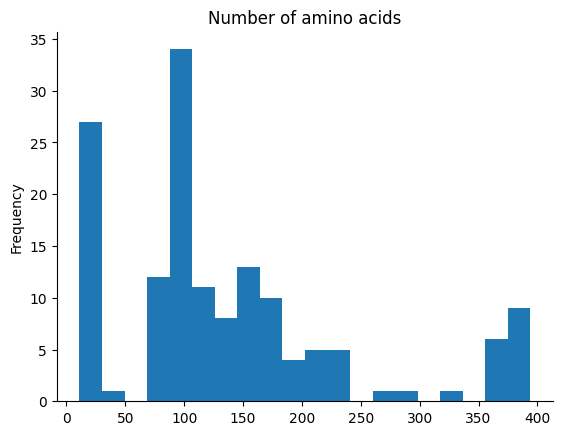

In [29]:
from matplotlib import pyplot as plt
df['Number of amino acids'].plot(kind='hist', bins=20, title='Number of amino acids')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [34]:
import math

def dist(p1, p2):
  x = 0
  y = 1
  z = 2
  return math.sqrt((p1[x] - p2[x])**2 + (p1[y] - p2[y])**2 + (p1[z] - p2[z])**2)

def distMap(atoms):
  m = []
  i = 0
  for a1 in atoms:
    m.append([])
    for a2 in atoms:
      m[i].append(dist(atoms[a1], atoms[a2]))
    i+=1
  return m

In [37]:
def getChain(chainId, lines):
  atoms = {}
  nucleotides = ['A', 'U', 'C', 'G']
  for l in lines:
    if l[21] == chainId and l[18:20].strip() in nucleotides:
      resSeq = int(l[22:26])
      x = float(l[30:38])
      y = float(l[39:46])
      z = float(l[47:54])
      atoms[resSeq] = (x, y, z)
    elif l[21] == chainId and l[13:15] == 'CA':
      resSeq = int(l[22:26])
      x = float(l[30:38])
      y = float(l[39:46])
      z = float(l[47:54])
      atoms[resSeq] = (x, y, z)
  return atoms

def getChains():
  chains = {}
  for filename in os.listdir(DATABASE_DIR):
    with open(f'{DATABASE_DIR}/{filename}', 'r') as fr:
      lines = fr.readlines()
      structCode = filename[:4]
      chainIDs = getChainIds(lines)
      if len(chainIDs) == 2:
        for chainID in chainIDs:
          chain = getChain(chainID, lines)
          if chain != {}:
            chains[structCode] = chain

  return chains

chains = getChains()
chains

{'1a4t': {1: (9.372, 1.492, 4.444),
  2: (6.572, 3.507, 2.733),
  3: (3.577, 1.426, 3.856),
  4: (1.198, 4.256, 5.105),
  5: (2.346, 6.94, 2.538),
  6: (1.534, 4.535, -0.398),
  7: (-1.57, 3.128, 1.526),
  8: (-3.236, 6.668, 1.789),
  9: (-3.485, 7.004, -2.104),
  10: (-4.3, 3.261, -2.86),
  11: (-6.803, 3.042, 0.151),
  12: (-8.969, 5.896, -1.38),
  13: (-9.46, 3.84, -4.641),
  14: (-9.698, 0.384, -2.905),
  15: (-12.479, 1.683, -0.598),
  16: (-14.31, 3.449, -3.509),
  17: (-14.344, 0.05, -5.504),
  18: (-16.548, -1.413, -2.651),
  19: (-18.475, 1.935, -1.998)},
 '1biv': {65: (-5.511, 3.766, 1.641),
  66: (-6.047, 6.942, 3.839),
  67: (-7.68, 10.168, 2.452),
  68: (-6.475, 9.278, -1.115),
  69: (-4.3, 6.108, -2.046),
  70: (-0.53, 6.249, -0.693),
  71: (1.834, 9.24, -1.201),
  72: (5.007, 7.325, -0.177),
  73: (6.963, 4.041, 0.546),
  74: (7.942, 5.761, 3.927),
  75: (11.52, 7.259, 4.159),
  76: (10.758, 10.019, 1.434),
  77: (10.232, 7.129, -1.216),
  78: (7.154, 8.638, -2.851),
  7

In [41]:
import plotly.express as px

fig = px.imshow(distMap(chains['8d49']))
fig.show()